# Práctica 2
## Desarrollado por Sara Pérez y Cristian Fernández
## 21 de Octubre de 2017
## Aprendizaje automático, EPS, UAM (Madrid)
## Introducción
XXXXXXXXXXXXXXXXXXXXXXXXXXXXX
## Objetivo
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

## Trabajo Desarrollado
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

### Cargando librerias

In [60]:
#Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt# Read Dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sklearn.feature_selection as FS
%matplotlib inline


### Simplifación de datos
#### Cargar datos

In [14]:
#Path para linux
path = '../Recursos/indian_liver_patient.csv'
#path = '/media/cristian/2DA699E5347481F7/Users/Cristian/Dropbox/Universidad/Master/1ºCuatrimestre/Practicas/ML/LAB2/Recursos/indian_liver_patient.csv'


#Path para Windows
#path = '..\Recursos\indian_liver_patient.csv'
dataset = pd.read_csv(path,delimiter=',',header=0)



# Eliminación de Missing values
dataset=dataset.dropna()



# Transformación de valores a binario
#dataset.replace("Male",0, True)
#dataset.replace("Female",1,True)
data["Gender"] = pd.Categorical.from_array(data["Gender"]).codes
#Modificamos la clase, para que la clase pase de 1-2 a 0-1
data['Dataset']=data['Dataset']-1

print(dataset.head())

# División aleatorioa 70 Traning 30 Test
#msk = np.random.rand(len(dataset)) < 0.7
#data_train = dataset[msk]
#data_test = dataset[~msk]
#data_test

train_test=train_test_split(dataset, test_size=0.3)
train=train_test[0]
test=train_test[1]


   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       1              0.7               0.1                   187   
1   62       0             10.9               5.5                   699   
2   62       0              7.3               4.1                   490   
3   58       0              1.0               0.4                   182   
4   72       0              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        0 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Categorical.from_array is deprecated, use Categorical instead


In [15]:
def zScore(var):
    return (var-var.mean())/var.std()
def minMax(var):
    return (var-var.min())/(var.max()-var.min())


#Normalizamos las variables (habrá casos en los que no se puedan usar normalizadas)
testNorm=test.copy()
trainNorm=train.copy()

testNorm['Albumin']=zScore(testNorm['Albumin'])
trainNorm['Albumin']=zScore(trainNorm['Albumin'])

testNorm['Total_Protiens']=zScore(testNorm['Total_Protiens'])
trainNorm['Total_Protiens']=zScore(trainNorm['Total_Protiens'])

testNorm['Total_Bilirubin']=minMax(testNorm['Total_Bilirubin'])
trainNorm['Total_Bilirubin']=minMax(trainNorm['Total_Bilirubin'])

testNorm['Direct_Bilirubin']=minMax(testNorm['Direct_Bilirubin'])
trainNorm['Direct_Bilirubin']=minMax(trainNorm['Direct_Bilirubin'])

testNorm['Alkaline_Phosphotase']=minMax(testNorm['Alkaline_Phosphotase'])
trainNorm['Alkaline_Phosphotase']=minMax(trainNorm['Alkaline_Phosphotase'])

testNorm['Alamine_Aminotransferase']=minMax(testNorm['Alamine_Aminotransferase'])
trainNorm['Alamine_Aminotransferase']=minMax(trainNorm['Alamine_Aminotransferase'])

testNorm['Aspartate_Aminotransferase']=minMax(testNorm['Aspartate_Aminotransferase'])
trainNorm['Aspartate_Aminotransferase']=minMax(trainNorm['Aspartate_Aminotransferase'])

testNorm['Albumin_and_Globulin_Ratio']=minMax(testNorm['Albumin_and_Globulin_Ratio'])
trainNorm['Albumin_and_Globulin_Ratio']=minMax(trainNorm['Albumin_and_Globulin_Ratio'])


In [16]:
#Separamos la variable target del resto
train_Y=train["Dataset"]
train_X=train.drop("Dataset",1)
trainNorm_X=trainNorm.drop("Dataset",1)

test_Y=test["Dataset"]
test_X=test.drop("Dataset",1)
testNorm_X=testNorm.drop("Dataset",1)
trainNorm_X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
490,53,1,0.005362,0.005495,0.063508,0.051497,0.009353,0.193769,0.560961,0.344
371,33,0,0.005362,0.005495,0.035173,0.011976,0.003660,0.651626,1.559048,0.480
390,72,0,0.005362,0.005495,0.041524,0.007784,0.004880,-0.447230,-0.187603,0.280
106,36,0,0.065684,0.120879,0.040059,0.013174,0.016470,-1.271371,-0.686646,0.280
543,40,0,0.010724,0.027473,0.068881,0.007784,0.003253,1.017911,1.060005,0.320


### Mutual information

In [29]:

mi_regr = mi_regr+ FS.mutual_info_regression(trainNorm_X, train_Y)
 
print(mi_regr)

indice_regr=np.argsort(mi_regr)[::-1]
print(indice_regr)


[ 0.09804316  0.          0.08488868  0.13391105  0.05928938  0.08893466
  0.13144464  0.00160926  0.08342905  0.04511903]
[3 6 0 5 2 8 4 9 7 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Como en cada ejecución de información mutua los valores varian bastante, debido a los bajos resultados obtenidos, hemos decidido realizar el calculo 100 veces y trabajar con la media de los calculos, donde vemos que ya mas o menos se obtienen resultados similares, o con cambios de posicion pequeños. 
Algunos ejemplos de variacion de indices:<br>
ej1: 5 0 9 6 3 4 2 8 7 1 <br>
ej2: 0 6 3 4 2 5 8 9 1 7<br>
ej3: 0 6 2 3 5 1 4 9 8 7<br>
ej4: 6 2 3 0 9 5 8 4 7 1<br>
ej5: 3 6 0 5 2 8 4 9 7 1<br>


In [ ]:
mi_regr = [ 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,]
for i in range(1, 100):
    mi_regr = mi_regr+ FS.mutual_info_regression(trainNorm_X, train_Y)

mi_regr=mi_regr/100   
print(mi_regr)
names=trainNorm_X.axes[1]
print (names)
indice_regr=np.argsort(mi_regr)[::-1]
print(indice_regr)
#print(names)
names[indice_regr]

In [35]:
mi_regr = [ 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,]
for i in range(1, 100):
    mi_regr = mi_regr+ FS.mutual_info_regression(trainNorm_X, train_Y)

mi_regr=mi_regr/100   
print(mi_regr)
names=trainNorm_X.axes[1]
print (names)
indice_regr=np.argsort(mi_regr)[::-1]
print(indice_regr)
#print(names)
names[indice_regr]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 wa

[ 0.0528033   0.00888086  0.05122181  0.05344276  0.03450481  0.05492655
  0.05471531  0.00214674  0.0182473   0.02763987]
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')
[5 6 3 0 2 4 9 8 1 7]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Index(['Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Direct_Bilirubin', 'Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Albumin_and_Globulin_Ratio', 'Albumin', 'Gender', 'Total_Protiens'],
      dtype='object')

En el caso de realizar la media vemos que los valores no varian tanto de una ejecucion a otra:<br>
ej1:3 5 0 6 2 4 9 1 8 7<br>
ej2:3 0 5 6 2 4 9 8 1 7<br>
ej3:3 0 5 6 2 4 9 8 1 7<br>
ej4:3 5 6 0 2 4 9 8 1 7<br>
ej5:5 6 3 0 2 4 9 8 1 7<br>

Y nos a partir de aqui vamos a usar los valores de ejecución 2 y 3 que son los mismos.

In [36]:
indice_regr = [ 3, 0, 5, 6, 2, 4, 9, 8, 1, 7]
names[indice_regr]

Index(['Direct_Bilirubin', 'Age', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Albumin_and_Globulin_Ratio', 'Albumin', 'Gender', 'Total_Protiens'],
      dtype='object')

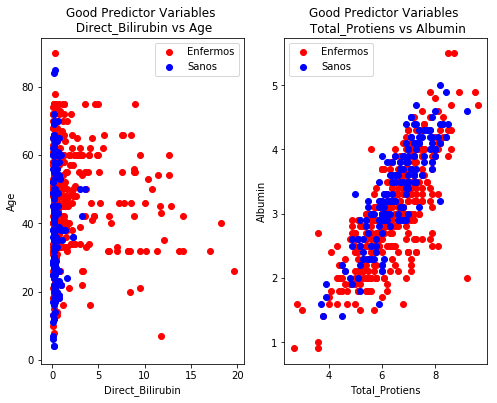

In [47]:
plt.figure(figsize=(8,6))
plt.subplot(121)

plt.scatter(dataset[dataset.Dataset==0].Direct_Bilirubin,dataset[dataset.Dataset==0].Age, color='red')
plt.scatter(dataset[dataset.Dataset==1].Direct_Bilirubin,dataset[dataset.Dataset==1].Age, color='blue')
plt.title('Good Predictor Variables \n Direct_Bilirubin vs Age')
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Age')
plt.legend(['Enfermos','Sanos'])

plt.subplot(122)

plt.scatter(dataset[dataset.Dataset==0].Total_Protiens,dataset[dataset.Dataset==0].Albumin, color='red')
plt.scatter(dataset[dataset.Dataset==1].Total_Protiens,dataset[dataset.Dataset==1].Albumin, color='blue')
plt.title('Good Predictor Variables \n Total_Protiens vs Albumin')
plt.xlabel('Total_Protiens')
plt.ylabel('Albumin')
plt.legend(['Enfermos','Sanos'])
plt.show()

Como se ve en las graficas, aunque las primeras dos variables (Direct_Bilirubin y Age) no separan bien los elementos, algo de esperar por los resultados tan bajos obtenidos, si estan mejor separadas que con dos de las tres ultimas variables (Total_Protiens y Albumin)

In [70]:
modelo_lr = LogisticRegression()
modelo_lr.fit(X=trainNorm_X.as_matrix()[:,:-1],y=train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
predicion = modelo_lr.predict(testNorm_X.as_matrix())
print(metrics.classification_report(y_true=test_Y, y_pred=predicion))
print(pd.crosstab(testNorm_X.as_matrix().Direct_Bilirubin, predicion, rownames=['REAL'], colnames=['PREDICCION']))

             precision    recall  f1-score   support

          0       0.69      0.97      0.81       118
          1       0.57      0.07      0.13        56

avg / total       0.65      0.68      0.59       174



AttributeError: 'numpy.ndarray' object has no attribute 'Direct_Bilirubin'

In [18]:
#EN chi^2 no se pueden usar valores negativos, por lo que no se pueden usar los datos normalizados 
chi = FS.chi2(X = train_X, y = train_Y)[0]
print(chi)
indice_chi=np.argsort(chi)[::-1]
print(indice_chi)
print(names[indice_chi])

[  3.43351354e+01   1.75793091e+00   2.24257615e+02   1.22843393e+02
   2.33442104e+03   4.36449096e+03   7.07491894e+03   4.33260791e-01
   3.17080817e+00   1.40776892e+00]
[6 5 4 2 3 0 8 1 9 7]
Index(['Aspartate_Aminotransferase', 'Alamine_Aminotransferase',
       'Alkaline_Phosphotase', 'Total_Bilirubin', 'Direct_Bilirubin', 'Age',
       'Albumin', 'Gender', 'Albumin_and_Globulin_Ratio', 'Total_Protiens'],
      dtype='object')
